<a href="https://colab.research.google.com/github/ramador-lab/NLP---Extracting-Key-Words/blob/main/CS4650_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='9685a292f65846cbb0b8fde1d008d966')

In [ ]:
temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-03-02', to='2022-03-28', sort_by='relevancy')

In [ ]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(temp, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')

df = pd.DataFrame(temp['articles'])

tokenizer = RegexpTokenizer(r'\w+')

def get_keywords_eng(token):
  result = []
  punctuation = string.punctuation
  stop_words = stopwords.words('english')
  
  for i in token:
    if (i in stop_words):
      continue
    else:
      result.append(i)

  return result


results = []
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
results

[['us', 'There', 'lot', 'ways', 'listen'],
 ['Most', 'significant', 'ruling', 'instances', 'sexual'],
 ['Mr', 'Adams', 'Democrat', 'regular', 'conversations'],
 ['Moderna', 'A', 'man', 'receiving', 'second'],
 ['Scarcely', 'two', 'months', 'Omicron', 'variant'],
 ['Dr', 'Jha', 'born', 'Bihar', 'state'],
 ['said', 'Earlier', 'month', 'Mr', 'Adams'],
 ['The', 'World', 'Health', 'Organization', 'often'],
 ['time', 'hour', '10', 'And', 'finally'],
 ['He', 'Its', 'fair', 'question', 'double'],
 ['A', 'street', 'festival', 'Cologne', 'Germany'],
 ['Mr', 'Biden', 'Ms', 'Harris', 'stood'],
 ['While', 'clinics', 'help', 'certain', 'parents'],
 ['The', 'arc', 'pandemic', 'dark', 'beginnings'],
 ['WASHINGTON', 'President', 'Biden', 'looking', 'usher'],
 ['China', 'COVID', 'March', '10', 'Reuters'],
 ['Britain', 'AstraZeneca', 'March', '17', 'Reuters'],
 ['Singapore', 'quarantine', 'March', '24', 'Reuters'],
 ['March', 'coronavirus', 'China', 'confirmed', 'cases'],
 ['China', 'COVID', 'March', '15

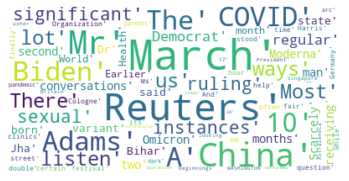

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()